## Apurva J. Lawate

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('titanic_cleaned.csv')

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


*dataset is cleaned and categories are made into columns with get_dummies()*

In [6]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Selecting Target and Features

In [7]:
x = data.drop('Survived',axis=1)
y = data['Survived']

### Scaling the data

In [8]:
#using standard scaler to scale the values between 0 to 1
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 96, stratify = y)

In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(n_neighbors=3)
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X=train_x, y = train_y,cv=10)
score

array([0.75      , 0.76470588, 0.74626866, 0.7761194 , 0.65671642,
       0.80597015, 0.86363636, 0.8030303 , 0.81818182, 0.74242424])

In [12]:
#percentage of mean and std deviation of scores of different k folds left for validation(for k neighbors = 3)
score.mean()*100, score.std()*100

(77.27053236491341, 5.293691037358145)

### Automating this process of cross validation for different k neighbors values

In [17]:
def crossval_for_nneighbors(n_neighbors):
    
    avg = []
    std = []
    
    for i in n_neighbors:
        clf = KNN(n_neighbors = i)
        score = cross_val_score(clf, X=train_x, y = train_y,cv=10)
        
        avg.append(score.mean())
        std.append(score.std())
        
    return avg, std

In [18]:
n_neighbors = range(1,50)
mean, std = crossval_for_nneighbors(n_neighbors)

In [27]:
print(mean.index(max(mean)))
print(std.index(min(std)))

13
35


### Plotting Mean and Std V/s K Neighbors

Text(0.5, 1.0, 'Mean Validation Score for N neighbors')

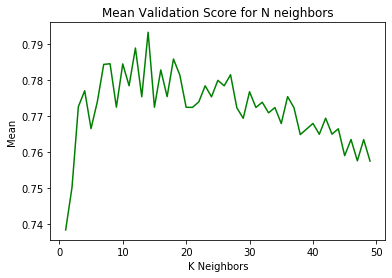

In [28]:
plt.plot(n_neighbors,mean,color = 'green')
plt.xlabel('K Neighbors')
plt.ylabel('Mean')
plt.title('Mean Validation Score for N neighbors')

### Plotting between k = 10 and 20

Text(0.5, 1.0, 'Mean Validation Score for N neighbors')

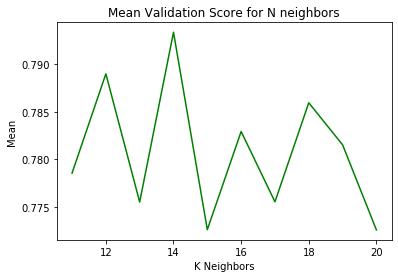

In [29]:
plt.plot(n_neighbors[10:20],mean[10:20],color = 'green')
plt.xlabel('K Neighbors')
plt.ylabel('Mean')
plt.title('Mean Validation Score for N neighbors')

Text(0.5, 1.0, 'Deviation Validation Score for N neighbors')

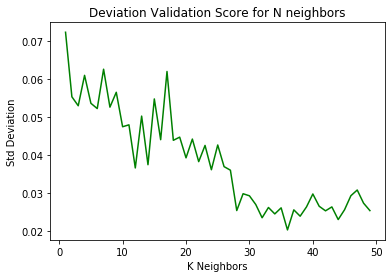

In [31]:
#Standard deviation
plt.plot(n_neighbors,std, color = 'green')
plt.xlabel('K Neighbors')
plt.ylabel('Std Deviation')
plt.title('Deviation Validation Score for N neighbors')

Text(0.5, 1.0, 'Deviation Validation Score for N neighbors')

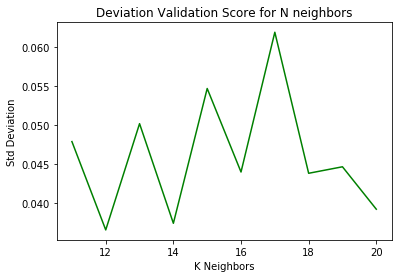

In [32]:
#Standard deviation between 10 and 20
plt.plot(n_neighbors[10:20],std[10:20], color = 'green')
plt.xlabel('K Neighbors')
plt.ylabel('Std Deviation')
plt.title('Deviation Validation Score for N neighbors')

**In bpth of above graphs of mean and std we can see 14 is optimum value for mean validation score is almost maximum and standard deviation is not too high neither too low**

In [35]:
#using 14 for k on model
clf = KNN(n_neighbors = 14)
clf.fit(train_x,train_y)

training_score = clf.score(train_x,train_y)
testing_score = clf.score(test_x,test_y)
training_score,testing_score

(0.811377245508982, 0.8161434977578476)

### training and testing score are almost similar. This model is optimum at k = 14